In [1]:
# Initialize Otter
import otter

grader = otter.Notebook("cs109a_hw2.ipynb")

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science
## Homework 2: kNN and Linear Regression

**Harvard University**<br/>
**Fall 2022**<br/>
**Instructors**: Pavlos Protopapas and Natesh Pillai

<hr style="height:2.4pt">

In [2]:
# RUN THIS CELL
import requests
from IPython.core.display import HTML

styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

#### Instructions
- To submit your assignment follow the instructions given in Canvas.
- Plots should be legible and interpretable without having to refer to the code that generated them, including labels for the $x$- and $y$-axes as well as a descriptive title and/or legend when appropriate.
- When asked to interpret a visualization, do not simply describe it (e.g., "the curve has a steep slope up"), but instead explain what you think the plot *means*.
- The use of 'hard-coded' values to try and pass tests rather than solving problems programmatically will not receive credit.
- The use of *extremely* inefficient or error-prone code (e.g., copy-pasting nearly identical commands rather than looping) may result in only partial credit.
- We have tried to include all the libraries you may need to do the assignment in the imports cell provided below. Please get course staff approval before importing any additional 3rd party libraries.
- Enable scrolling output on cells with very long output.
- Feel free to add additional code or markdown cells as needed.
- Ensure your code runs top to bottom without error and passes all tests by restarting the kernel and running all cells. This is how the notebook will be evaluated (note that this can take a few minutes).

In [3]:
# RUN THIS CELL
import os
import pathlib

working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

# Import libraries
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import operator
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# pandas tricks for better display
pd.options.display.max_columns = 50
pd.options.display.max_rows = 500
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

#extra imports
from sklearn.preprocessing import OneHotEncoder as ohe, PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")



<a id="contents"></a>

## Notebook Contents

- [**PART 1 [60 pts]: Predicting the selling price of cars on CarDekho.com**](#part1)
  - [Part 1 Overview](#part1intro)
  - [Question 1: Exploratory data analysis (EDA) [10 pts]](#part1questions)
  - [Question 2: k-Nearest Neighbors [25 pts]](#part2questions)
  - [Question 3: Simple linear regression [25 pts]](#part3questions)


- [**PART 2 [40 pts]: Analysis of Simulated ASEC Data**](#part2)
  - [Part 2 Overview](#part2intro)
  - [Question 4:   Investigating trends [25 pts]](#part4questions)
  - [Question 5:  Calculate the Gini coefficient [10 pts]](#part5questions)
  - [Question 6:  Critiquing the simulated data [5 pts]](#part6questions)


## About this homework

This assignment is the first in which we'll go through the process of loading a dataset, splitting it into train and test sets, performing some preprocessing, and finally fitting some models and evaluating our results.

We have two different datasets:
- [**PART 1**](#part1) car data from [cardekho.com](https://www.cardekho.com/)
- [**PART 2**](#part2) *simulated* income data created from the [Annual Social and Economic (ASEC) Supplement](https://www.census.gov/data/datasets/time-series/demo/cps/cps-asec.2021.html)

Part 1 explores two simple methods for prediction,  **k-nearest neighbors regression (kNN)**, a *non-parametric* method, and **linear regression**, a *parametric* method.

Part 2 is focused EDA and visualization.

<a id="part1"></a>
    
# PART 1 [60 pts]: Predicting the selling price of cars on CarDekho.com

[Return to contents](#contents)

<a id="part1intro"></a>

## Overview

[Return to contents](#contents)

According to its website, **CarDekho.com** is India's leading car search venture. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons, as well as videos and pictures of all car brands and models available in India. Each car has a **current selling price**, which is the price for buying a used car on this site, and an **MRP**, which is the retail price of the car. These two prices differ depending on factors such as brand, make year, mileage, condition, etc.  

### Dataset 

The dataset contains 601 used cars and is available as `data/car_dekho_full.csv`. It contains the following columns:

- **Year** - make year (year the car was made), 
- **Current_Selling_Price** - current price of a used car on CarDekho.com (in lakhs),
- **MRP** - maximum retail price of the car when it was new (in lakhs). 
- **Kms_Driven** - number of kilometers

**NOTE:** 1 *lakh*  is 100,000 Rupees in the Indian numbering system. Also, kilometers are used as a measure of distance instead of miles.

### Objective

Using kNN and linear regression we will predict the `Current_Selling_Price` from the other features available in this dataset.

<a id="part1questions"></a>

## <div class='exercise'><b> Question 1: Exploratory data analysis (EDA) [10 pts]</b></div>

[Return to contents](#contents)

To reach the goal of predicting the `Current_Selling_Price`, start by inspecting the dataset using Exploratory Data Analysis (EDA).

**Load the dataset, inspect it, and answer the following questions:**

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q1.1</b></div>

Identify all variables in the dataset. Which ones are quantitative, and which ones are categorical? If you think any variables are categorical, briefly explain why.

_Points:_ 2

One may define a categorical variable as measuring an attribute that can only be given as a property of the variable (i.e., that wouldn't have any added value if isolated from the variable in question in another context). An example of a categorical variable in the current dataset would be the year the car was sold: it has a limited number of possibilities and assumes only one of the possible outcomes. 
A quantitative variable refers to attributes that can be measured in terms of magnitude/size, i.e., that we can "quantify". In this dataset, this would be "Current_Selling_Price", "MRP", "Kms_Driven", as they all satisfy this property. 

In [4]:
car_dekho = pd.read_csv("./data/car_dekho_full.csv")

In [5]:
car_dekho.describe()

,Year,Current_Selling_Price,MRP,Kms_Driven
count,601.000,601.000,601.000,601.000
mean,2013.887,4.393,6.912,33718.745
std,2.721,4.518,6.480,26846.657
min,2003.000,0.120,0.320,500.000
25%,2012.000,1.050,1.470,15000.000
50%,2015.000,3.600,6.050,30000.000
75%,2016.000,5.800,9.400,46500.000
max,2018.000,33.000,36.230,213000.000


In [6]:
car_dekho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   601 non-null    int64  
 1   Current_Selling_Price  601 non-null    float64
 2   MRP                    601 non-null    float64
 3   Kms_Driven             601 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 18.9 KB


In [7]:
car_dekho.head()

,Year,Current_Selling_Price,MRP,Kms_Driven
0,2016,5.25,5.70,3493
1,2005,3.51,13.70,75000
2,2010,0.31,1.05,213000
3,2006,2.10,7.60,50456
4,2005,0.20,0.57,55000


In [8]:
print("The different variables in this dataset are:")
for i in car_dekho.columns:
    print(i)

The different variables in this dataset are:
Year
Current_Selling_Price
MRP
Kms_Driven


<!-- END QUESTION -->

<div class='exercise'><b>Q1.2</b></div>

What are the means and standard deviations for `Current_Selling_Price` and `MRP`?

Store your results in `mean_csp`, `mean_mrp`, `std_csp`, and `std_mrp` to match the variable names used in the provided print function.

_Points:_ 2

In [9]:
mean_csp = np.mean(car_dekho["Current_Selling_Price"])
mean_mrp = np.mean(car_dekho["MRP"])
std_csp = np.std(car_dekho["Current_Selling_Price"])
std_mrp = np.std(car_dekho["MRP"])

In [10]:
# Be certain to name your variables mean_csp, mean_mrp, std_csp, std_mrp
# to match the variable names used in the provided print function
print(
    "\n"
    f"The mean Current Selling Price is {mean_csp:.4f} lakhs\n"
    f"The mean MRP is {mean_mrp:.4f} lakhs\n"
    f"The Standard Deviation of Current Selling Price is {std_csp:.4f}\n"
    f"The Standard Deviation of MRP is {std_mrp:.4f}"
)


The mean Current Selling Price is 4.3931 lakhs
The mean MRP is 6.9116 lakhs
The Standard Deviation of Current Selling Price is 4.5146
The Standard Deviation of MRP is 6.4747


In [11]:
grader.check("q1.2")

q1.2 results: All test cases passed!

<div class='exercise'><b>Q1.3</b></div>

What is the range of kilometers that the cars have been driven? Store your answer in the variable `km_range`.

**Hint:** 'range' here refers the difference between the highest and lowest recorded kilometers driven.

_Points:_ 2

In [12]:
# your code here
km_range = np.max(car_dekho["Kms_Driven"]) - np.min(
    car_dekho["Kms_Driven"]
)  # Using the hint

In [13]:
# check your result
print(f"the range of kilometers is {km_range:,.2f}")

the range of kilometers is 212,500.00


In [14]:
grader.check("q1.3")

q1.3 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q1.4</b></div>

The goal in this section is to identify the best feature to use to predict our response, `Current_Selling_Price`. 

- Plot a scatter plot of each feature and our reponse and examine any relationships.
- Which is the predictor that seems to best predict `Current_Selling_Price`? Provide an interpretation of the plots that justifies your choice.

_Points:_ 4

The predictor that seems to best predict Current_Selling_Price is MRP. This is because we can observe an overall pattern: Current_Selling_Price seems to increase with MRP, which is maximum retail price of the car when it was new. The highest Current Selling Price is obtained for an MRP of ~ 35, and the lowest for MRP ~ 0. 
Intuitively, it would make sense for the highest retail price that a car ever reached to be an accurate predictor of its current price. Depreciation of this kind of asset is usually not very fast (unless there has been some sort of accident, which would explain the points that fall outside this pattern).

# Plotting a scatter plot between Current_Selling_Price and MRP
plt.scatter(car_dekho["MRP"], car_dekho["Current_Selling_Price"], color="blue")
plt.xlabel("MRP")
plt.ylabel("Current_Selling_Price")
plt.title("Current Selling Price v.s. MRP");

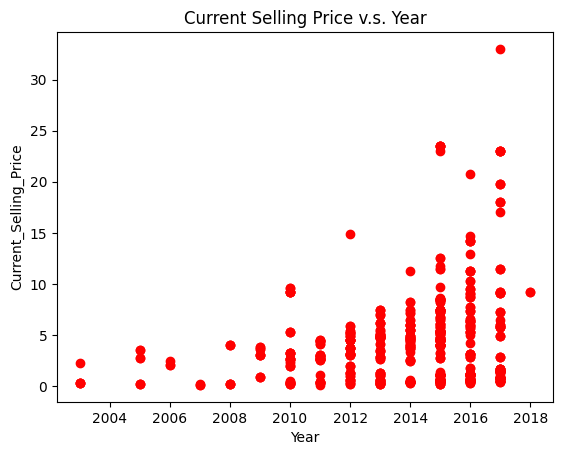

In [15]:
# Plotting a scatter plot between Current_Selling_Price and Year
plt.scatter(car_dekho["Year"], car_dekho["Current_Selling_Price"], color="red")
plt.xlabel("Year")
plt.ylabel("Current_Selling_Price")
plt.title("Current Selling Price v.s. Year");

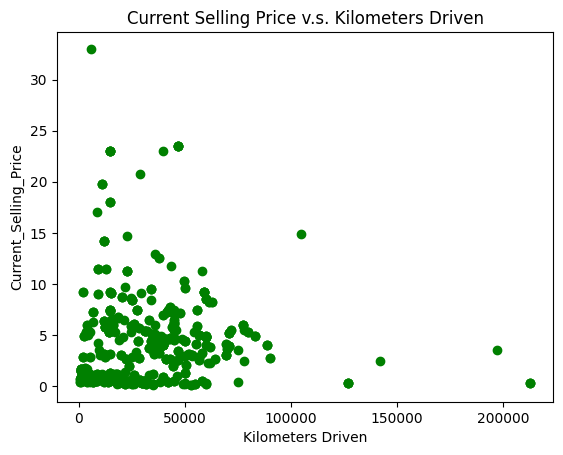

In [16]:
# Plotting a scatter plot between Current_Selling_Price and Kms_Driven:
plt.scatter(car_dekho["Kms_Driven"], car_dekho["Current_Selling_Price"], color="green")
plt.xlabel("Kilometers Driven")
plt.ylabel("Current_Selling_Price")
plt.title("Current Selling Price v.s. Kilometers Driven");

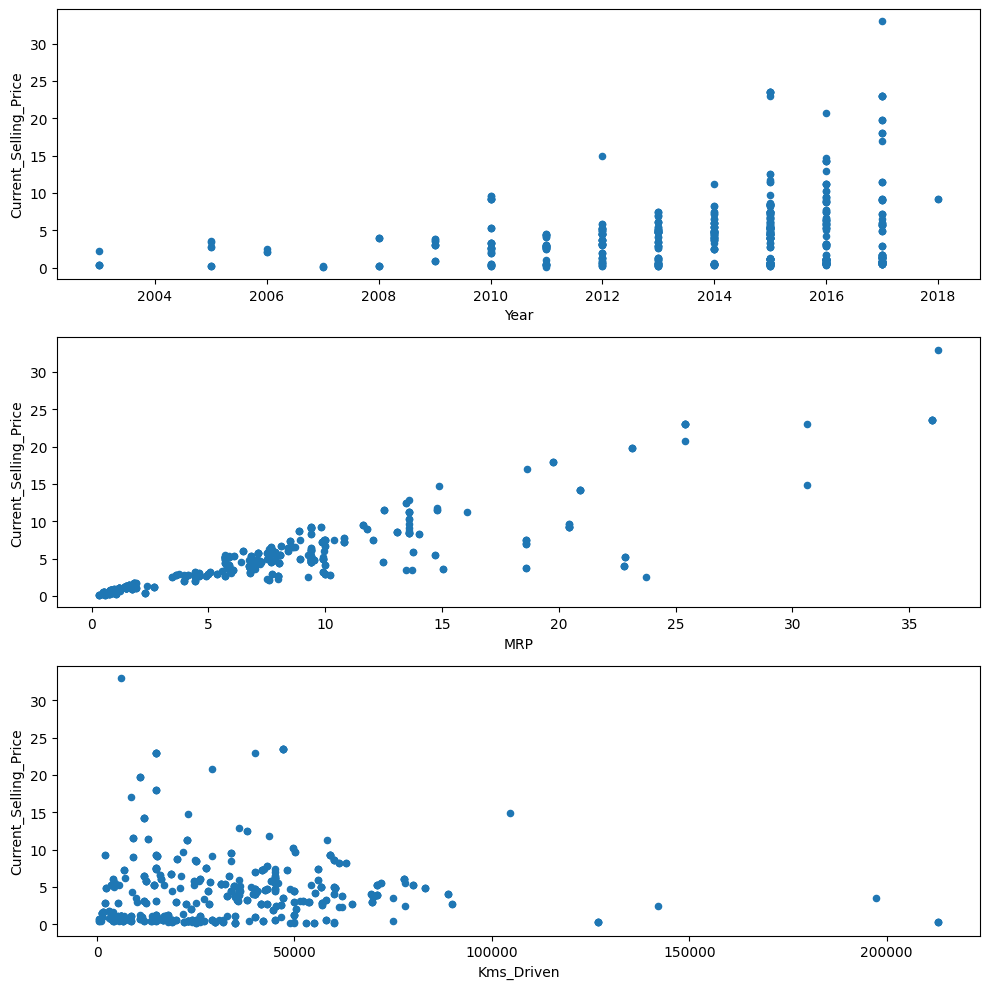

In [17]:
# Doing it the way we did it in lab:

cols = car_dekho.drop("Current_Selling_Price", axis=1).columns

# with built in pandas plot functionality
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))
# flatten the axes
axes = axes.ravel()

for c, ax in zip(cols, axes):
    car_dekho.plot(x=c, y="Current_Selling_Price", kind="scatter", ax=ax)

# add some space between the graphs
plt.tight_layout()

<!-- END QUESTION -->

<a id="part2questions"></a>

## <div class='exercise'><b> Question 2:   k-Nearest Neighbors [25 pts]</b></div>

[Return to contents](#contents)

We will begin our modeling with k-Nearest Neighbors (kNN) regression, using `sklearn` for both preprocessing and model fitting.

<div class='exercise'><b>Q2.1</b></div>

Split the dataset into a train and test set with 75% training data and 25% testing data, using argument `random_state = 109`. The resulting splits should be stored in the variables `X_train`, `X_test`, `y_train`, `y_test`.

_Points:_ 2

In [18]:
# Splitting dataset into training set and test set

y = car_dekho[["Current_Selling_Price"]]  # Selecting year as target variable
X = car_dekho[["MRP"]]  # Selecting all variables except Year as predictors

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=109
)  # 75% training and 25% test

In [19]:
# We can check the shapes of our arrays to make sure that we
# named the output correctly:

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((450, 1), (151, 1), (450, 1), (151, 1))

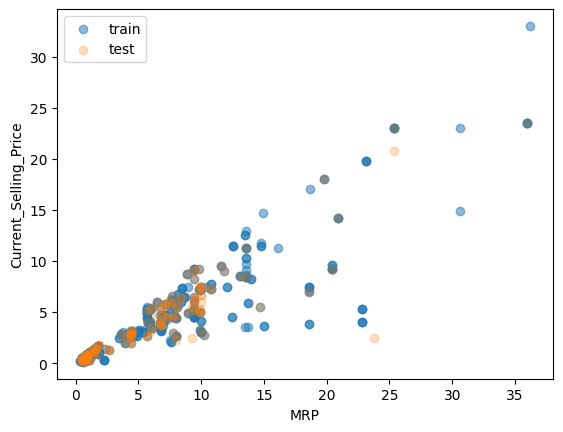

In [20]:
# It may also be useful to inspect if the split was random:

plt.scatter(X_train, y_train, alpha=0.50, label="train")
plt.scatter(X_test, y_test, alpha=0.25, label="test")
plt.xlabel("MRP")
plt.ylabel("Current_Selling_Price")
plt.legend();

In [21]:
grader.check("q2.1")

q2.1 results: All test cases passed!

<div class='exercise'><b>Q2.2</b></div>

Now, we will fit several kNN regression models for various values of $k$ to identify the best parameterization.

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.2.1</b></div>

For each $k$ in $k \in [1,2,3,5,7,10,50,100]$, fit a k-NN regression model to the training data with response `Current_Selling_Price` and the predictor `MRP`. 
  - For each $k$, make a plot of reponse vs. predictor (8 plots in total, arranged in a 4×2 grid). 
  - Each of your 8 plots should clearly show (a) the training data and the testing data in different colors, (b) the model prediction, and (c) title, legend, and axis labels.
  - **NOTE:** Feel free to use the `plt.subplots()` code we provide to specify your 4x2 grid, unless you first try that and decide that you have a clearer, cleaner way of accomplishing this task. 

_Points:_ 7

In [22]:
# fig, axs = plt.subplots(4,2, figsize=(12, 14))
# fig.subplots_adjust(hspace = .5, wspace=.3)
# your code here

regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [23]:
ks = [1, 2, 3, 5, 7, 10, 50, 100]

# We need to fit kNN regressors on a range of k values
# We will then inspect the loss as a function of k

for k in ks:
    curr_knn = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)


# Say we want to look at the predictions for 1000 points:
x_lin = np.linspace(X.min(), X.max(), 1000)

# Saving the predictions of each regressor to a list
all_predictions = []
for k in ks:
    predictions = (
        KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train).predict(x_lin)
    )
    all_predictions.append(predictions)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

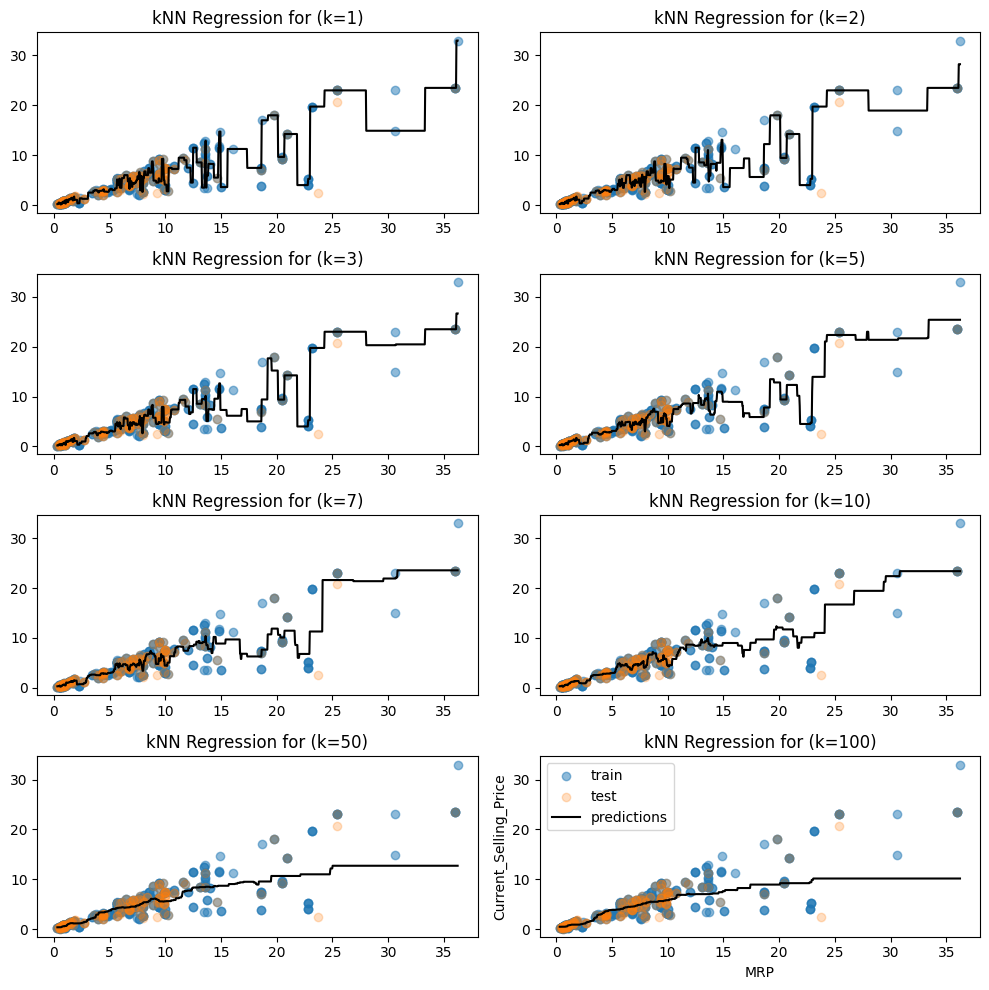

In [24]:
fig, axes = plt.subplots(nrows=len(all_predictions) // 2, ncols=2, figsize=(10, 10))
axes = axes.ravel()

for cur_preds, ax, k in zip(all_predictions, axes, ks):
    # print(idx, cur_preds)
    ax.scatter(X_train, y_train, alpha=0.50, label="train")
    ax.scatter(X_test, y_test, alpha=0.25, label="test")
    ax.plot(x_lin, cur_preds, c="k", label="predictions")
    plt.xlabel("MRP")
    plt.ylabel("Current_Selling_Price")
    ax.set_title(f"kNN Regression for (k={k})")
    plt.legend()


# #add some space between the graphs
plt.tight_layout()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.2.2</b></div>

Plot the training and test $MSE$ values as a function of $k$ (1 plot in total).

_Points:_ 4

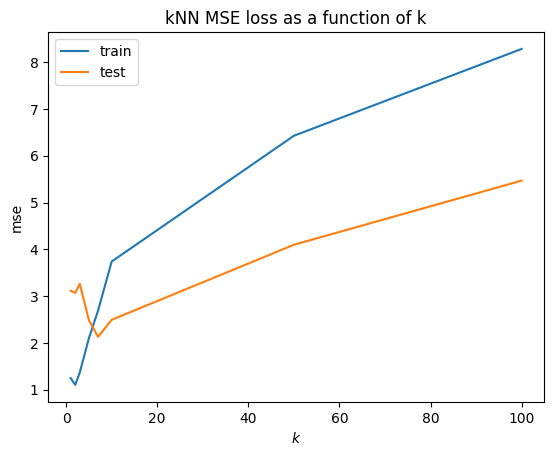

In [25]:
# your code here

# Defining a function to retrieve both metrics
def get_metrics(model, name: str) -> dict:
    d = {}
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)

    # car_dekho['name']= name TODO: remove
    d["train_mse"] = mean_squared_error(y_train, y_hat_train)
    d["test_mse"] = mean_squared_error(y_test, y_hat_test)
    d["r2_train"] = r2_score(
        y_train, y_hat_train
    )  # We include the R2 metric as it is relevant to 2.2.4
    d["r2_test"] = r2_score(y_test, y_hat_test)

    return d


# We then store the train and test MSEs for each model:

train_mses = []
test_mses = []
train_r2s = []
test_r2s = []

for k in ks:
    cur_knn = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    cur_metrics = get_metrics(cur_knn, "")
    train_mses.append(cur_metrics["train_mse"])
    test_mses.append(cur_metrics["test_mse"])
    train_r2s.append(cur_metrics["r2_train"])
    test_r2s.append(cur_metrics["r2_test"])

# We are then able to plot the training and test MSE values
# as a function of k

plt.plot(ks, train_mses, label="train")
plt.plot(ks, test_mses, label="test")
# Making the plot include the "best k" (relevant to 2.2.3)
# plt.axvline(best_k, c='k', ls='--',label=rf'best $k$ ={best_k}') TODO: Find a way to add this line
plt.xlabel(r"$k$")
plt.ylabel("mse")
plt.title("kNN MSE loss as a function of k")
plt.legend();

<!-- END QUESTION -->

<div class='exercise'><b>Q2.2.3</b></div>

Find the best model based on the test $MSE$ values. Store the best $k$-value in `best_k` and the best test $MSE$ in `best_mse`.

_Points:_ 2

In [26]:
for i, m in enumerate(test_mses):
    print(f"k={ks[i]}   mse={m}")

k=1   mse=3.115705298013245
k=2   mse=3.068942715231788
k=3   mse=3.2624665930831496
k=5   mse=2.485495178807947
k=7   mse=2.129064833085552
k=10   mse=2.494036834437086
k=50   mse=4.097270187019868
k=100   mse=5.467377202119207


In [27]:
# your code here

best_idx = np.argmin(test_mses)
best_k = ks[best_idx]
best_mse = np.min(test_mses)

In [28]:
print(
    f"The best k value is {best_k}. This corresponds to the "
    f"lowest test MSE of {best_mse:.3f}."
)

The best k value is 7. This corresponds to the lowest test MSE of 2.129.


In [29]:
grader.check("q2.2.3")

q2.2.3 results: All test cases passed!

<div class='exercise'><b>Q2.2.4</b></div>

Evaluate and report the $R^2$ of the best model. Save the $R^2$ of the best model in `best_r2`.

_Points:_ 2

In [30]:
# your code here
knn = KNeighborsRegressor(best_k)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
best_r2 = r2_score(predictions, y_test)

In [31]:
print(
    f"The R-squared score evaluated on the test set for the best model "
    f"with k={best_k} is {best_r2:.4f}."
)

The R-squared score evaluated on the test set for the best model with k=7 is 0.8430.


In [32]:
grader.check("q2.2.4")

q2.2.4 results: All test cases passed!

<div class='exercise'><b>Q2.3</b></div>

In this section you will discuss your results by answering the following questions.  You should answer the questions directly in the provided markdown cells of your notebook.

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.3.1</b></div>

How does the value of $k$ affect the fitted model?

_Points:_ 2

Smaller $k_{s}$ do not seem to approximate the data as well. This is because evaluating fewer neighbors reduces the "effort" of the regressors and fitting the data almost perfectly.

 If K is too large, for example if k =n. Then the model is simply taking the average of the points, which is just a baseline model.
  
 Ideally, K should be a medium sized value

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.3.2</b></div>

If $n$ is the number of observations in the training set, what can you say about a kNN regression model that uses $k = n$?  

_Points:_ 2

Picking k of size n means that you your k-nearest neighbors are now composed of all of the training samples. This is equivalent to using the majority vote for classification, meaning that the prediction of the model is simply the average value of the n point. This is not a good predictor in most cases

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q2.3.3</b></div>

Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.

_Points:_ 2

Training and test MSE's experience different trends at first (train MSE displays a steady increase from the start, while test MSE starts by decreasing and then joins the same trend). Value of k seems to be negatively correlated with the test MSE at first (latter decreases with increase in magnitude of k), but then seems to be positively correlated. This same positive correlation is representative of the relationship between k and train MSE for all ks that we are considering here. 

As K is near zero for the train data set, then the model will be over fitting as a result, MSE for the train data approaches zero as k approaches zero

<!-- END QUESTION -->

<div class='exercise'><b>Q2.3.4</b></div>

If you were to change the `random_state` argument to `train_test_split` above and re-run the code, do you think would select the same model? If not, why?

_Points:_ 2

`random_state` hyperparameter controls what is used to seed the random generator. Setting random_state=None results in obtaining different training and test sets upon each execution, and results in no control over the shuffling process, hence we do not know which model it will select. Assigning 0 to random_state would mean obtaining the same train and test sets across different executions, and hence we would know which model it would select. 

<a id="part3questions"></a>

## <div class='exercise'><b>Question 3:  Simple linear regression [25 pts]</b></div>

[Return to contents](#contents)

<div class='exercise'><b>Q3.1</b></div>

We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables you used in the kNN model. You will also use the same 75% training and 25% testing split of the data, which was created using `random_state = 109`.

<div class='exercise'><b>Q3.1.1</b></div>

Fit a linear regression model. Name your model `linreg`.

_Points:_ 6

In [33]:
# your code here
# Instantiate a LinearRegression class object and fit with train data
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [34]:
grader.check("q3.1.1")

q3.1.1 results: All test cases passed!

<div class='exercise'><b>Q3.1.2</b></div>

Report the slope and intercept values for the fitted linear model. Name your variables `slope` and `intercept`.

_Points:_ 4

In [35]:
# your code here
slope = float(linreg.coef_)
intercept = float(linreg.intercept_)

In [36]:
print(
    f"Intercept of the fitted linear model\t\t{slope:.4f}\n"
    f"Slope of the fitted linear model\t{intercept:.4f}"
)

Intercept of the fitted linear model		0.6157
Slope of the fitted linear model	0.1124


In [37]:
grader.check("q3.1.2")

q3.1.2 results: All test cases passed!

<div class='exercise'><b>Q3.1.3</b></div>

Report the $MSE$ for the training and test sets and the $R^2$ for the test set. Name your variables `lin_train_mse`, `lin_test_mse`, and `lin_test_r2`.

_Points:_ 4

In [38]:
get_metrics(linreg, "Linear Regression")

{'train_mse': 4.713332797955167,
 'test_mse': 3.13616705217417,
 'r2_train': 0.78360301169206,
 'r2_test': 0.8052856808135864}

In [39]:
# your code here
# Compute the MSE of the model
# We invoke the previously defined "get_metrics()" function
# We store the dictionary that gives us these metrics and extract the values from it
linear_regression_metrics = get_metrics(linreg, "Linear Regression")

lin_train_mse = linear_regression_metrics["train_mse"]
lin_test_mse = linear_regression_metrics["test_mse"]
# Compute the R-squared of the model
lin_test_r2 = linear_regression_metrics["r2_test"]

In [40]:
print("Linear regression model results:\n")
print(
    "\tTrain MSE\t{:.4f}\n"
    "\tTest MSE\t{:.4f}\n".format(
        lin_train_mse,
        lin_test_mse,
    )
)

print(f"\tTest R-squared\t{lin_test_r2:.4f}")

Linear regression model results:

	Train MSE	4.7133
	Test MSE	3.1362

	Test R-squared	0.8053


In [41]:
grader.check("q3.1.3")

q3.1.3 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.1.4</b></div>

Plot the **residuals**, $e = y - \hat{y}$, of the model on the **training** set as a function of the **response** variable. Draw a horizontal line denoting the zero residual value on the $y$-axis.

_Points:_ 5

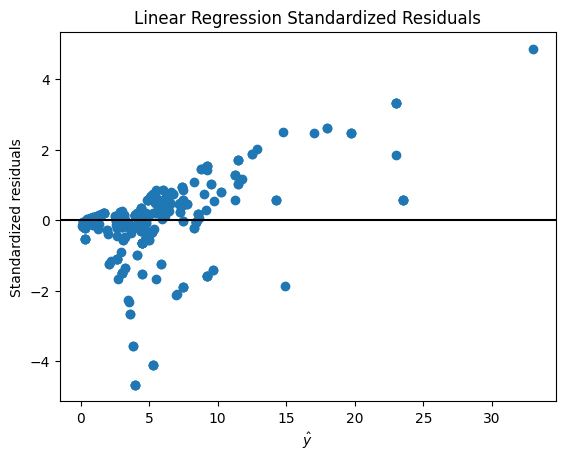

In [42]:
# your code here
y_hat_train = linreg.predict(X_train)
residuals = y_train - y_hat_train

# We consider standardizing the results:
# we now interpret the y-axis as "standardized
# residuals" as opposed to residuals

standardized_residuals = (residuals - residuals.mean()) / residuals.std()

plt.scatter(y_train, standardized_residuals)
plt.axhline(0, c="k")
plt.ylabel("Standardized residuals")
plt.title("Linear Regression Standardized Residuals")
plt.xlabel("$\hat{y}$");

<!-- END QUESTION -->

<div class='exercise'><b>Q3.2</b></div>
Answer the following questions about your results:

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.2.1</b></div>

How does the test $MSE$ score compare with the best test $MSE$ value obtained with kNN regression? 

_Points:_ 2

Test MSE in this case is ~ 3.13. Best test MSE was ~ 2.129 with kNN regression. Current test MSE is therefore higher. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.2.2</b></div>

What does the sign of the slope of the fitted linear model convey about the relationship between the predictor and the response?

_Points:_ 2

The slope is 0.1124, which is positive. This is representative of a positive linear relationship between Current_Selling_Price and MRP i.e., that Current_Selling_Price increases with MRP. This means for every one unit increase in X we can expect a 0.1124 increase in current selling price

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q3.2.3</b></div>

Discuss the shape of the residual plot and what it shows for the quality of the model. Be sure to discuss whether or not the assumption of linearity is valid for this data.

_Points:_ 2

The residuals seem to be centered around the horizontal line at first, but then become increasingly scattered (this means that the predictions become worse and worse) thus probably reflecting heteroskedasticity. The plot then does not have a shape to it, and is completely asymmetrical, suggesting our model has room for improvement. Essentially, this would mean that "generally, CSP is a good indicator of MRP but it can sometimes not be the case at all". This casts doubt over the assumption of linearity for this data. 

<!-- END QUESTION -->

<a id="part2"></a>
    
# PART 2 [40 pts]: Analysis of 2021 US Annual Social and Economic (ASEC) Supplement

[Return to contents](#contents)

<a id="part2intro"></a>

## Overview

[Return to contents](#contents)

In this part we analyze *simulated* income data from the publically available 2021 US Annual Social and Economic (ASEC) Supplement (https://www.census.gov/data/datasets/time-series/demo/cps/cps-asec.2021.html), provided by the US Census Bureau. The Current Population Survey (CPS) has been conducted monthly for over 50 years. Currently, about 54,000 households are interviewed monthly, scientifically selected on the basis of area of residence to represent the nation as a whole, individual states, and other specified areas. 

### Dataset

The simulated data can be found in `data/census_data.csv`.

The number of features have been greatly reduced from the original dataset. You can see the description of the original dataset in the [ASEC data dictionary](https://www2.census.gov/programs-surveys/cps/datasets/2021/march/asec2021_ddl_pub_full.pdf).

In addition to subsetting the features, other preprocessing steps have been taken. For example, some categorical variables have had their number of unique values reduced. 

We refer to the data as *simulated* because sampling was used to turn what was originally an ordinal response variable (42 income brackets) into something more continous.

Considering this, the results of your analysis should be viewed skeptically. You can view the the preprocessing steps taken to create the simplified, simulated data in `data/preprocessing.ipynb`.

**NOTE:** Variables have been renamed for easier interpretation. You can find the original variable names in the preprocessing notebook. It will be these original variable names that appear in the data dictionary linked above.

### Features
- **age** - Age of person 
- **hourly_pay** - Hourly salary of person (-1 if person is not payed by the hour)
- **hours_per_week** - Number of hours usually worked per week
- **weeks_worked** - Number of weeks worked per year

- **sex** - {'Female': 0,'Male': 1} 
- **marital_status** - {'married':0,'widowed':1,'Divorced':2, 'Separated':3,'Never married':4}
- **military_service** - {'has not served in the US armed forces':0,'has served in the US armed forces':1}
- **student_status** - {'Not currently studying':0,'Enrolled full-time':1, 'Enrolled part-time':1}
- **education** - {'Not finished high school': 0, 'High school': 1, 'Associate degree': 2, 'Bachelor\'s': 3, ,'Master\'s': 4,'Professional school degree': 5', Doctorate': 6}

- **race** - {'White': 0, 'Black': 1, 'American Indian, Alaskan Native only (AI)': 2, 'Asian': 3, ,'Hawaiian, Pacific Islander (HP)': 4,'White-Black': 5', 'White-AI': 6, 'White-Asian': 7, 'White-HP': 8, 'Black-AI': 9, 'Black-Asian': 10, 'Black-HP': 11, 'AI-Asian': 12, 'AI-HP': 13, 'Asian-HP': 14, 'other race combinations': 15}

- **industry** - Industry that the person is working in {'Other': 0, 'Agriculture, forestry, fishing, hunting': 1, 'Mining': 2, 'Construction': 3, ,'Manufacturing': 4,'Wholesale and retail trade': 5','Transportation and utilities': 6, 'Information': 7, 'Financial activities': 8, 'Professional and business services': 9, 'Education and health services': 10, 'Leisure and hospitality': 11, 'Other services': 12, 'Public administration': 13, 'Armed Forces': 14}

- **occupation** - Occupation of person {'Other': 0, 'Management, business, and financial occ.': 1, 'Professional and related occ.': 2, 'Service occ.': 3, ,'Sales and related occ.': 4,'Office and administrative support occ.': 5','Farming, fishing and forestry': 6, 'Construction and extraction occ.': 7, 'Installation, maintenance and repair occ.': 8, 'Production occ.': 9, 'Transportation and material moving occ.': 10, 'Armed Forces': 11}


- **income** - Annual income in dollars

<a id="part4questions"></a>

## <div class='exercise'><b>Question 4: Investigating trends [25 pts]</b></div>

[Return to contents](#contents)

Below we'll answer questions about potential trends in the data with the help of plots and simple statistics.

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.1</b></div>

In [43]:
census = pd.read_csv("./data/census_data.csv")
census.head()
census.info()
census.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121845 entries, 0 to 121844
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        121845 non-null  int64  
 1   age               121845 non-null  int64  
 2   weeks_worked      121845 non-null  int64  
 3   hours_per_week    121845 non-null  int64  
 4   hourly_pay        121845 non-null  int64  
 5   student_status    121845 non-null  int64  
 6   education         121845 non-null  int64  
 7   marital_status    121845 non-null  int64  
 8   sex               121845 non-null  int64  
 9   military_service  121845 non-null  int64  
 10  race              121845 non-null  int64  
 11  industry          121845 non-null  int64  
 12  occupation        121845 non-null  int64  
 13  is_paid_by_hour   121845 non-null  int64  
 14  person_record     121845 non-null  int64  
 15  income            121845 non-null  float64
dtypes: float64(1), int64

Index(['Unnamed: 0', 'age', 'weeks_worked', 'hours_per_week', 'hourly_pay',
       'student_status', 'education', 'marital_status', 'sex',
       'military_service', 'race', 'industry', 'occupation', 'is_paid_by_hour',
       'person_record', 'income'],
      dtype='object')

Is there a disparity in income of participants by gender? Consider using a log scale or another technique when plotting to communicate findings more clearly.

_Points:_ 3

The below plots are evidence of income disparity by gender. Overall, the density of female employees concentrated in the lower income ranges is greater than that for men, and vice-versa. However, an additional comment should probably be made about the fact that men tend to work more on average, with a higher density for men than for women at the 40-hour mark. 

In [44]:
# Checking value counts:
# Recall that Male = 1, Female = 0
census["sex"].value_counts()

0    63578
1    58267
Name: sex, dtype: int64

In [45]:
census.columns

Index(['Unnamed: 0', 'age', 'weeks_worked', 'hours_per_week', 'hourly_pay',
       'student_status', 'education', 'marital_status', 'sex',
       'military_service', 'race', 'industry', 'occupation', 'is_paid_by_hour',
       'person_record', 'income'],
      dtype='object')

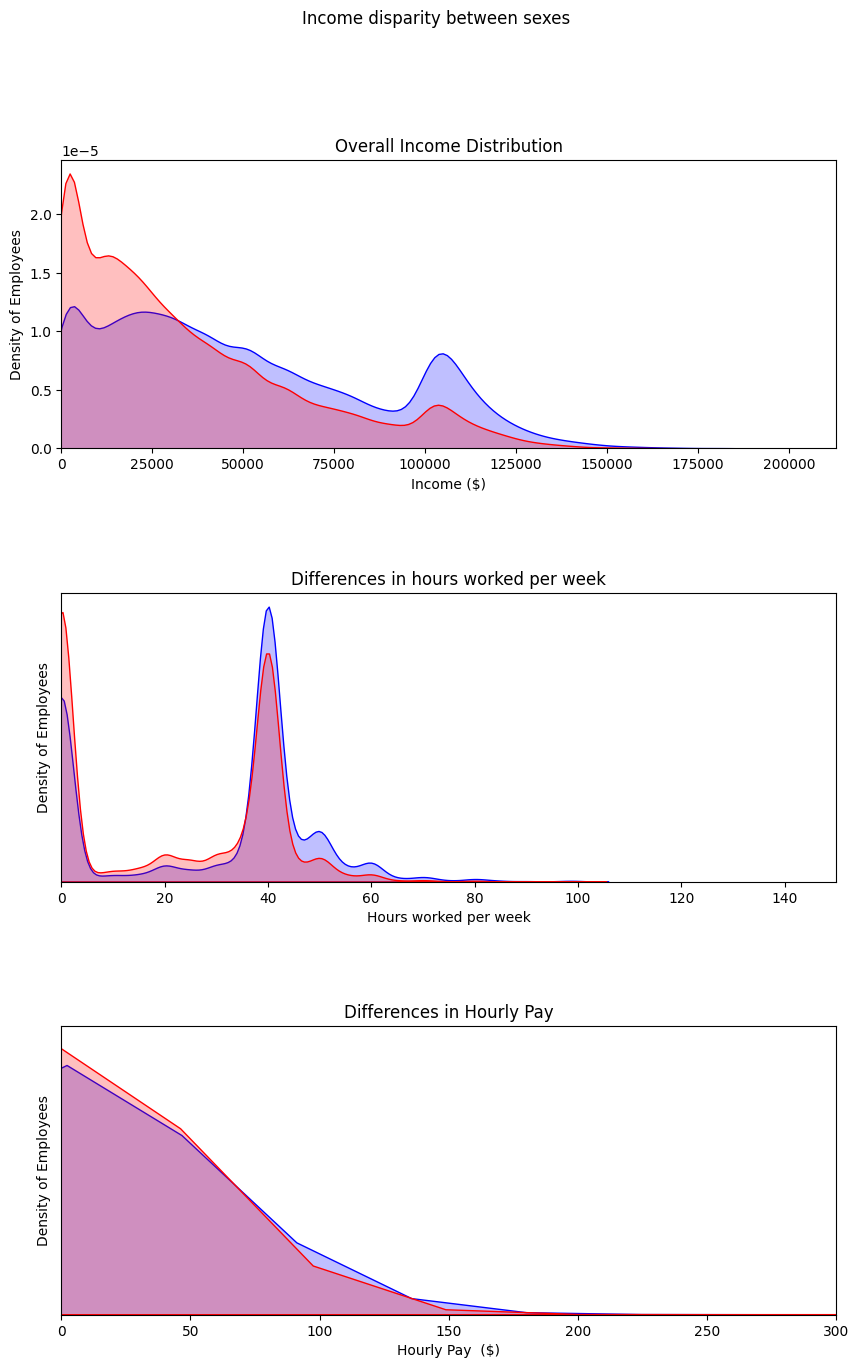

In [46]:
male_only = census[census["sex"] == 1]
female_only = census[census["sex"] == 0]

fig = plt.figure(figsize=(10, 15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle("Income disparity between sexes")

# Generate the top plot
ax = fig.add_subplot(3, 1, 1)
ax = sns.kdeplot(male_only["income"], color="Blue", label="Male", shade=True)
ax = sns.kdeplot(female_only["income"], color="Red", label="Female", shade=True)
plt.title("Overall Income Distribution")
plt.ylabel("Density of Employees")
plt.xlabel("Income ($)")
plt.xlim(0, census["income"].max())


fmt = "${x:,.0f}"
tick = mtick.StrMethodFormatter(fmt)
plt.yticks()


# Generate the middle plot
ax2 = fig.add_subplot(3, 1, 2)
ax2 = sns.kdeplot(male_only["hours_per_week"], color="Blue", label="Male", shade=True)
ax2 = sns.kdeplot(
    female_only["hours_per_week"], color="Red", label="Female", shade=True
)
plt.ylabel("Density of Employees")
plt.xlabel("Hours worked per week")
plt.xlim(0, 150)
plt.yticks([])
plt.title("Differences in hours worked per week")

# Generate the bottom plot
ax3 = fig.add_subplot(3, 1, 3)
ax3 = sns.kdeplot(male_only["hourly_pay"], color="Blue", label="Male", shade=True)
ax3 = sns.kdeplot(female_only["hourly_pay"], color="Red", label="Female", shade=True)
plt.ylabel("Density of Employees")
plt.xlabel("Hourly Pay  ($)")
plt.xlim(0, 300)
plt.yticks([])
plt.title("Differences in Hourly Pay")

plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.2</b></div>

Is there a relationship between income and the "occupation" variable? 

_Points:_ 3

Aligning the box plots and sorting them by the mean of income in a specific occupation category allows us to see that income does indeed vary somewhat significantly by occupation. For example, someone in a management-related occupation can expect to make more on average than someone in armed forces. 

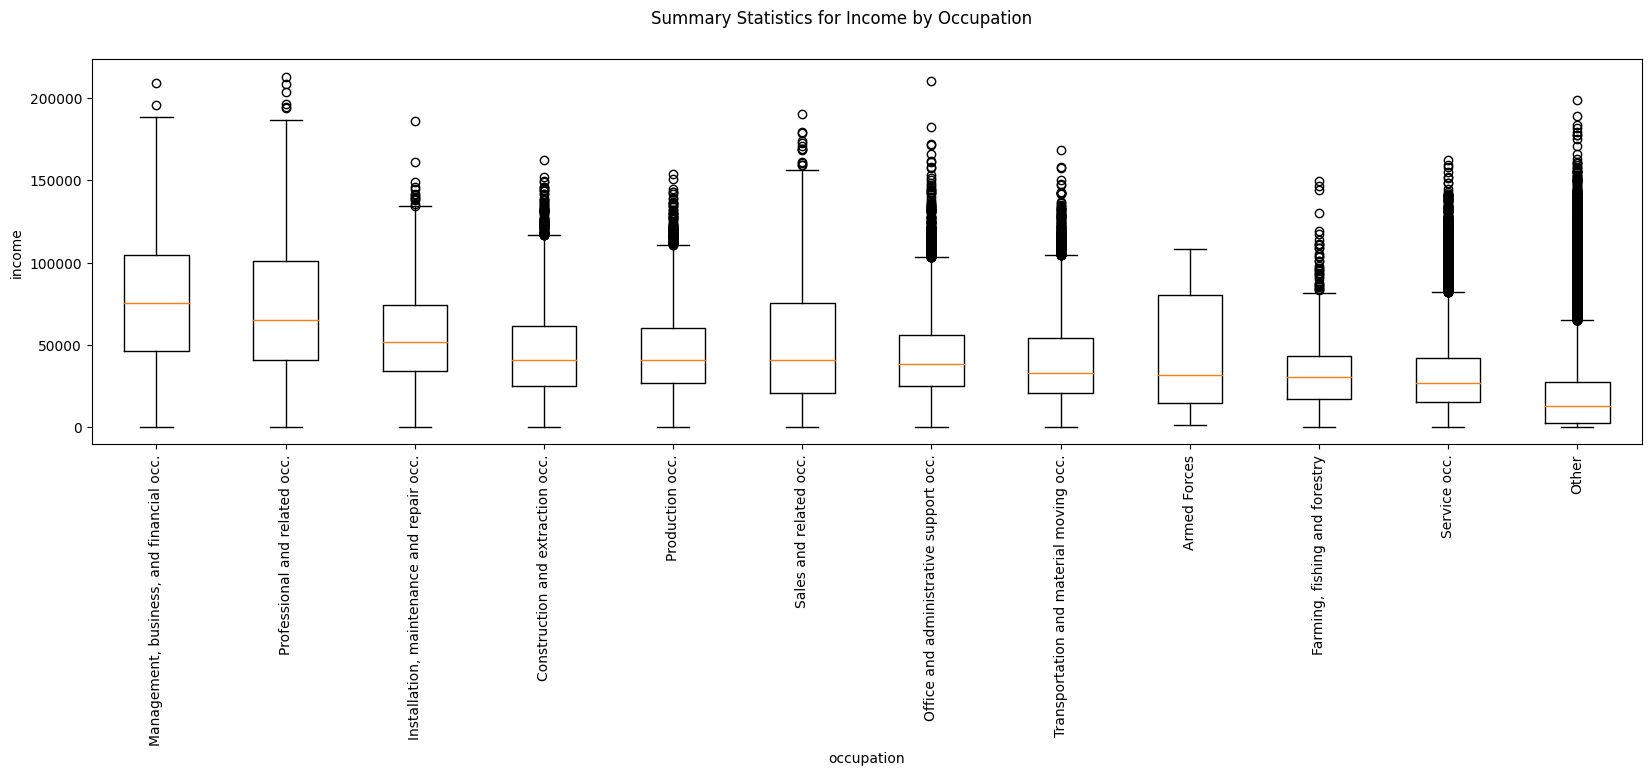

In [47]:
# your code here
OCCUPATION_CODES = {
    "Other": 0,
    "Management, business, and financial occ.": 1,
    "Professional and related occ.": 2,
    "Service occ.": 3,
    "Sales and related occ.": 4,
    "Office and administrative support occ.": 5,
    "Farming, fishing and forestry": 6,
    "Construction and extraction occ.": 7,
    "Installation, maintenance and repair occ.": 8,
    "Production occ.": 9,
    "Transportation and material moving occ.": 10,
    "Armed Forces": 11,
}

# swap keys and values
OCCUPATION_CODES = {value:key for key, value in OCCUPATION_CODES.items()}

# giving string labels to occupations codes
census["occupation_label"] = census["occupation"].apply(lambda x: OCCUPATION_CODES[x])
occupations = census["occupation_label"].unique()

# storing graph data in a dict
data_dict = {}
for occupation in occupations:
    data_dict[occupation] = census[census["occupation_label"] == occupation]["income"].to_list()
    
data_dict = {k:v for k,v in sorted(data_dict.items(), key=lambda item: np.median(np.array(item[1])), reverse=True)}

# plot results
fig, ax = plt.subplots(1,1, figsize=(20,5))
ax.set_xlabel("occupation")
ax.set_ylabel("income")
fig.suptitle("Summary Statistics for Income by Occupation")


ax.boxplot(data_dict.values());
ax.set_xticklabels(data_dict.keys(), rotation=90);




<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.3</b></div>

Let's investigate a few questions about education and income:
- Is there a relationship between income and education level? 

- Is this trend similar across both genders in the dataset? 

- Is it possible to consider education level as an ordinal variable? For instance, consider whether retaining this ordering as in the dataset might be preferable to education level complexion as a categorical variable lacking order. 

_Points:_ 4

There seems to be a clear positive relationship between income and education level, and plotting both figures enables us to assert that this trend is similar across both genders in the data set (income increases with education for both sexes). Yes it is possible to consider education level as an ordinal variable. Our "EDUCATION_LABELS" dictionary is representative of a certain order, that reflects the time dedicated towards obtaining each degree: numbers increase with time dedicated towards each degree. However, "Professional School Degree" may cast a doubt over this analysis (# 5). This is because it seems to boast high income levels, but the time needed for these degrees usually range from 1-5 years, and thus may constitute an exception to the rule. 

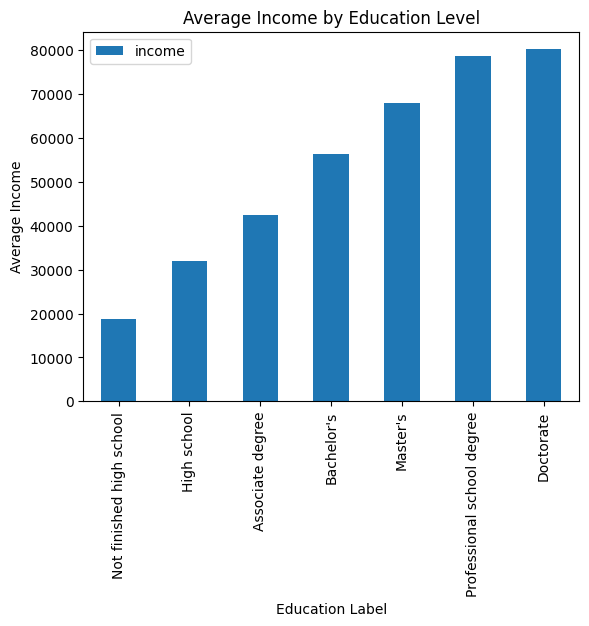

In [48]:
# Relationship between income and education

EDUCATION_LABELS = {0:'Not finished high school',
                    1:'High school', 
                    2:'Associate degree', 
                    3:'Bachelor\'s',
                    4:'Master\'s',
                    5:'Professional school degree',
                    6:'Doctorate'
                   }

census["education_label"] = census["education"].apply(lambda number: EDUCATION_LABELS[number])

plot = (census.groupby("education_label")
 .agg({"income":"mean"})
 .sort_values("income")
 .plot.bar(title="Average Income by Education Level", 
           xlabel="Education Label",
           ylabel="Average Income")
)

plot;

In [49]:
# See if there is a relationship between education level and income
one_hot_encode = pd.get_dummies(census["education_label"])
one_hot_encode = one_hot_encode.join(census["income"])

X = one_hot_encode.drop("income", axis=1)
y = one_hot_encode["income"]

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80, random_state = 109, shuffle=True)

linreg = LinearRegression(fit_intercept=False)
linreg.fit(X_train, y_train)

print("---RESULTS---")
print(f"Train MSE: {mean_squared_error(y_train, linreg.predict(X_train))}")
print(f"Test MSE: {mean_squared_error(y_test, linreg.predict(X_test))}")
print(f"Train R^2: {linreg.score(X_train,y_train)}")
print(f"Test R^2: {linreg.score(X_test,y_test)}")
print("\n")
print("---Coefficents---")
print(pd.DataFrame(zip(X.columns,linreg.coef_), columns=["degree","coefficent"]).set_index("degree").sort_values("coefficent", ascending=False))




---RESULTS---
Train MSE: 1029562324.1767843
Test MSE: 1035922432.9423256
Train R^2: 0.1978653260581389
Test R^2: 0.20066351998080922


---Coefficents---
                            coefficent
degree                                
Doctorate                    80060.328
Professional school degree   78755.503
Master's                     68088.844
Bachelor's                   56344.148
Associate degree             42396.072
High school                  32112.913
Not finished high school     18752.202


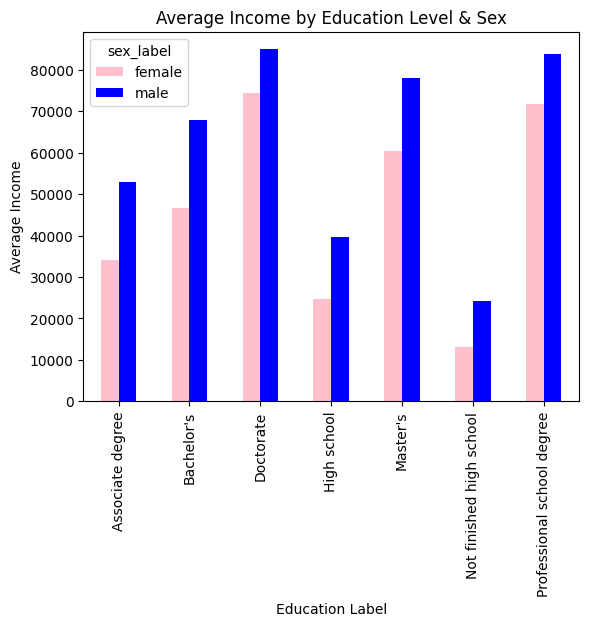

In [50]:
# compare the relationship between income and education level across genders
census["sex_label"] = census["sex"].apply(lambda num: "male" if num == 1 else "female")



plot = (census.groupby(["education_label","sex_label"])
 .agg({"income":"mean"})
 .sort_values("income")
 .reset_index()
 .pivot(index="education_label", columns="sex_label", values="income")
 .plot.bar(color=["pink","blue"],
           title="Average Income by Education Level & Sex", 
           xlabel="Education Label",
           ylabel="Average Income")
)

plot;


In [51]:
#extra imports
from sklearn.preprocessing import OneHotEncoder , PolynomialFeatures


data = census[["education_label","sex_label","income"]].copy()

X = data[["education_label","sex_label"]]
y = data["income"]

X_train, X_test, y_train, y_test = train_test_split(
                                            X, y, 
                                            random_state=109,                                       
                                            test_size = 0.2, 
                                            shuffle=True
                                            )

# one hot encoding
drop_strategy = 'first'
unknown_strategy = 'ignore'
ohe = OneHotEncoder(drop=drop_strategy, 
                    sparse=False, 
                    handle_unknown=unknown_strategy
                   ) 

# One Hot Encode Training Data
ohe_train = ohe.fit_transform(X_train)
ohe.get_feature_names_out()
ohe_train_df = pd.DataFrame(ohe_train, columns=ohe.get_feature_names_out())

# One Hot Encode Testing Data
ohe_test = ohe.transform(X_test)
ohe_test_df = pd.DataFrame(ohe_test, columns=ohe.get_feature_names_out())

# Set up Polynmoial
poly = PolynomialFeatures(degree=2, 
                          interaction_only=True,
                          include_bias=False)

# Compute the polynomial features in train set
poly_train = poly.fit_transform(ohe_train_df)
poly_train_df = pd.DataFrame(poly_train, columns=poly.get_feature_names_out())

# Compute the polynomial features in test set
poly_test = poly.transform(ohe_test_df)
poly_test_df = pd.DataFrame(poly_test, columns=poly.get_feature_names_out())

# only doing interaction terms for gender and education
poly_train_df = poly_train_df[poly_train_df.columns[poly_train_df.sum()> 0]]
poly_test_df = poly_test_df[poly_test_df.columns[poly_test_df.sum()> 0]]

# regression
linreg = LinearRegression(fit_intercept=True)
linreg.fit(poly_train_df, y_train)

y_train_pred = linreg.predict(poly_train_df)
y_test_pred = linreg.predict(poly_test_df)

# R^2
r2_train = linreg.score(poly_train_df, y_train) 
r2_test = linreg.score(poly_test_df, y_test)

print("---R^2---")
print(f"R^2 Train: {r2_train}")
print(f"R^2 Test: {r2_test}")

print("\n")
print("---Coefficents---")

print(f'Intercept: {linreg.intercept_:.3}')
results = (pd.DataFrame(zip(poly_train_df.columns, linreg.coef_), columns=['feature', 'coeff'])
           .set_index("feature")
           .sort_values("feature")
          )

print(results)


---R^2---
R^2 Train: 0.25147257621912344
R^2 Test: 0.25680331541005263


---Coefficents---
Intercept: 3.43e+04
                                                               coeff
feature                                                             
education_label_Bachelor's                                 12388.397
education_label_Bachelor's sex_label_male                   2541.837
education_label_Doctorate                                  39981.190
education_label_Doctorate sex_label_male                   -8101.675
education_label_High school                                -9633.348
education_label_High school sex_label_male                 -3470.868
education_label_Master's                                   26662.756
education_label_Master's sex_label_male                    -1810.110
education_label_Not finished high school                  -21143.845
education_label_Not finished high school sex_label_male    -7563.802
education_label_Professional school degree                 38

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.4</b></div>

Is there a discernable trend in the incomes of participants from different industries?

_Points:_ 3

There seems to be indeed a discernable trend in the incomes of participants from different industries. Our figure below shows us that, for example, an individual in the mining industry makes considerably more than someone in the leisure and hospitality industry. 

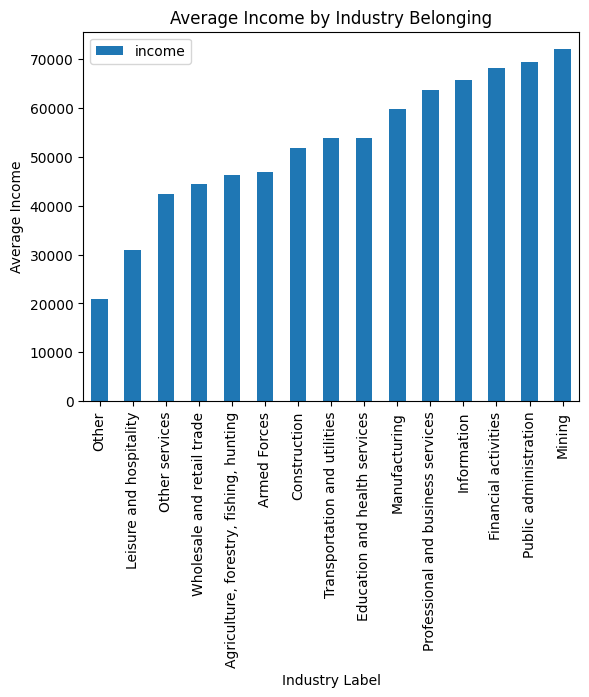

In [52]:
# your code here

INDUSTRY_LABELS = {'Other': 0, 
                   'Agriculture, forestry, fishing, hunting': 1, 
                   'Mining': 2, 
                   'Construction': 3, 
                   'Manufacturing': 4,
                   'Wholesale and retail trade': 5,
                   'Transportation and utilities': 6, 
                   'Information': 7, 'Financial activities': 8, 
                   'Professional and business services': 9, 
                   'Education and health services': 10, 
                   'Leisure and hospitality': 11, 
                   'Other services': 12, 
                   'Public administration': 13, 
                   'Armed Forces': 14}

INDUSTRY_LABELS = {v:k for k,v in INDUSTRY_LABELS.items()}
census["industry_label"] = census["industry"].apply(lambda number: INDUSTRY_LABELS[number])

plot = (census.groupby("industry_label")
 .agg({"income":"mean"})
 .sort_values("income")
 .plot.bar(title="Average Income by Industry Belonging", 
           xlabel="Industry Label",
           ylabel="Average Income")
)

plot;

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.5</b></div>

Is there a clear trend between age and income?

_Points:_ 3

There seems to be no discernable trend: at first, average income seems to grow exponentially with age to then shift with a sharp u-turn. The age group between 40 and 50 then marks a downward shift: from there onwards, average income seems to decrease with age. 

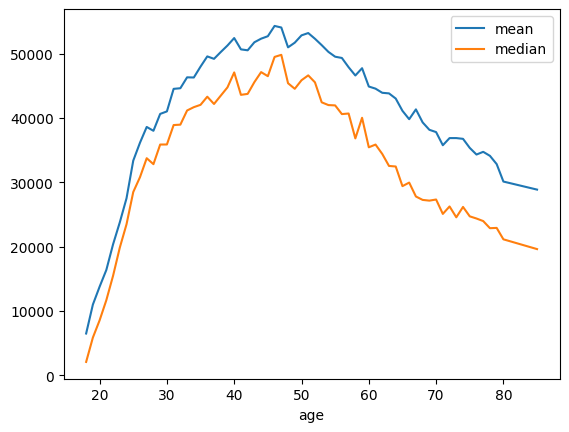

In [53]:
mode = pd.Series.mode

#INCASE OF ValueError: Must produce aggregated value, Use this for mode
mode = lambda x: pd.Series.mean(pd.Series.mode(x))

df = census[["age","income"]].groupby(["age"]).agg(["mean","median",mode])
df.columns = df.columns.droplevel(0)
df.rename(columns={"<lambda_0>":"mode"}, inplace=True)

df[["mean","median"]].plot();



In [54]:
# your code here
linear_regressor = LinearRegression()

X = census[["age"]]
y = census["income"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, shuffle=True, random_state=109)

# train linear regression model
linear_regressor.fit(X_train, y_train)
predictions = linear_regressor.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)


print(f"MSE = {mse}\nRsquared = {r_squared}")



MSE = 1295556329.627817
Rsquared = 0.0016952302038862888


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.6</b></div>

Do any of the quantitative attributes show a clear relationship with income? If so, are these relationships linear or non-linear?

_Points:_ 3

"age" seems to show a clear relationship with income: it is first a positive one, then shifts to a negative one (see question above). However, the relationship is not linear and would most likely be approximated using a polynomial regression as opposed to a linear one. It is also apparent that people who work more hours per week typically have a larger income. Likewise, people who work more weeks of the year have a higher reported income. People who have a high hourly wage tend to make a higher income, but there is a lot of variance between high hourly wages and annual income

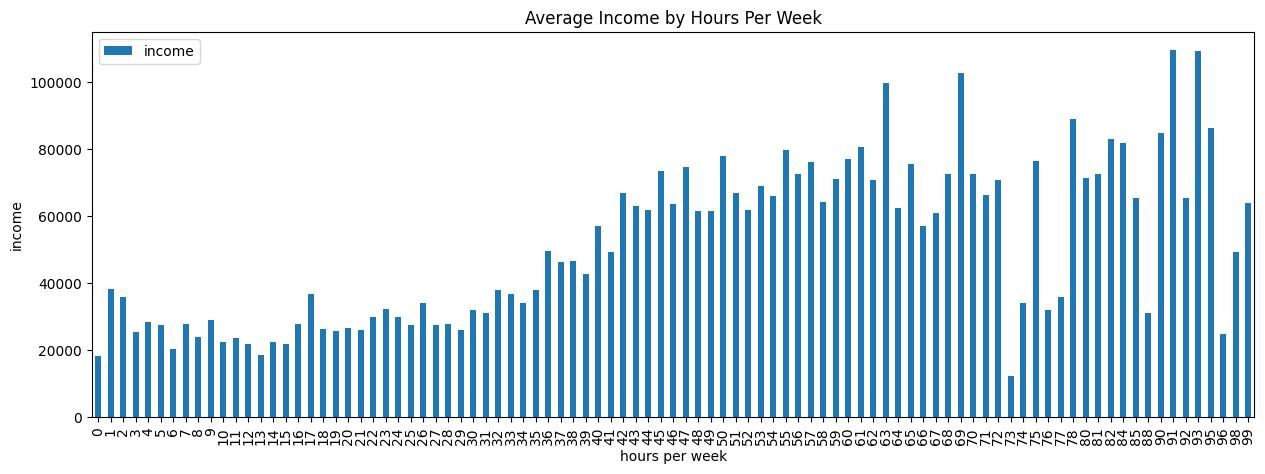

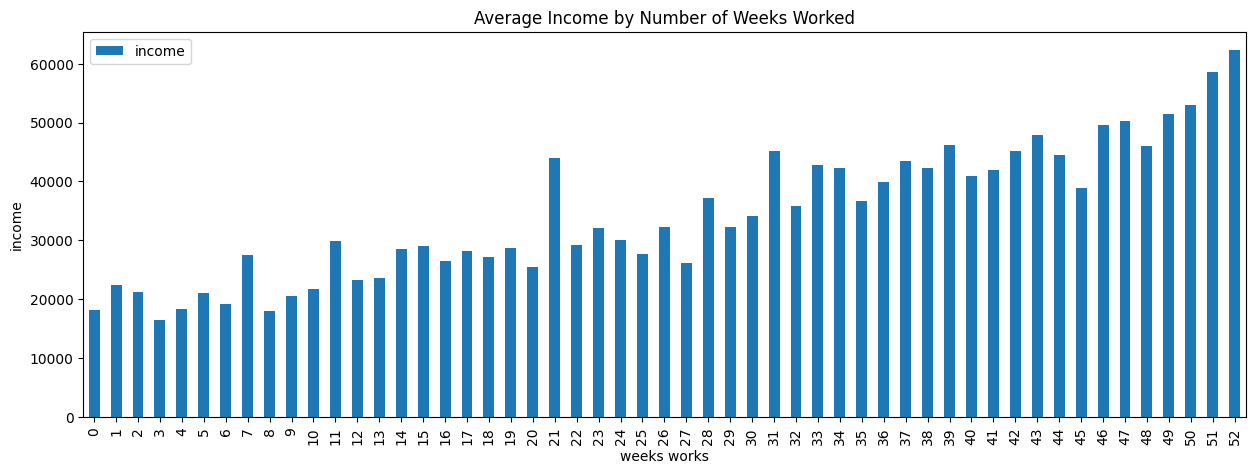

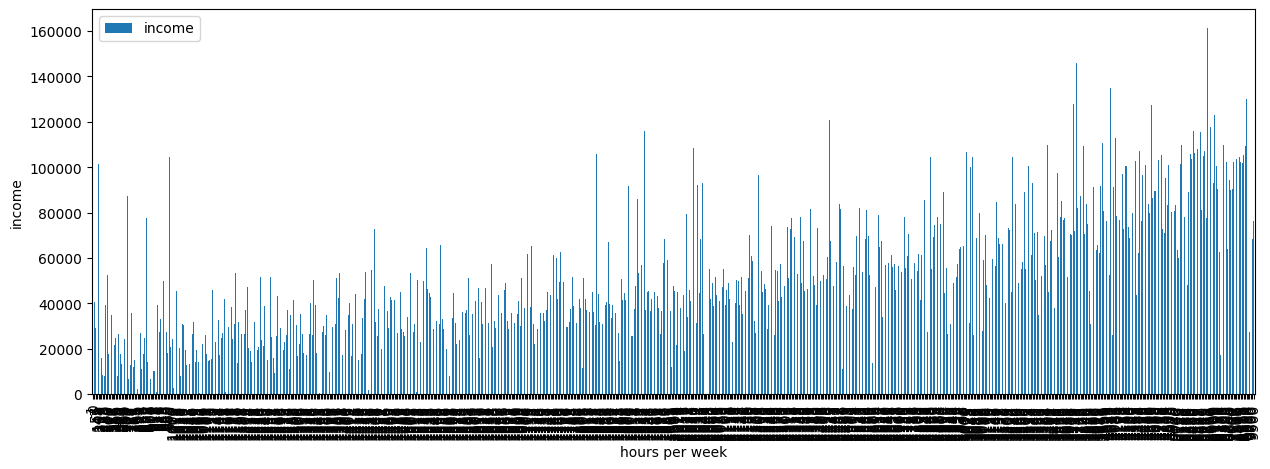

In [55]:
# your code here
quantitative_to_income = census[[
"hours_per_week",
"hourly_pay",
"weeks_worked",
"income"
]]

hours_per_week = census[["hours_per_week","income"]].groupby("hours_per_week").agg({"income":"mean"}).reset_index().plot.bar(x="hours_per_week", y="income", figsize=(15,5), xlabel="hours per week", ylabel="income", title= "Average Income by Hours Per Week")
weeks_worked = census[["weeks_worked","income"]].groupby("weeks_worked").agg({"income":"mean"}).reset_index().plot.bar(x="weeks_worked", y="income", figsize=(15,5), xlabel="weeks works", ylabel="income", title= "Average Income by Number of Weeks Worked")

hourly_pay = census[["hourly_pay","income"]].groupby("hourly_pay").agg({"income":"mean"}).reset_index().plot.bar(x="hourly_pay", y="income", figsize=(15,5), xlabel="hours per week", ylabel="income")


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.7</b></div>

What is the relationship between income and the different values for `marital_status` in the dataset?

_Points:_ 3

Running a linear regression (and plotting the average incomes) shows that: a married person can expect to earn an average of 49010.26 dollars, a divorced person an average of 42365.96 dollars, etc. This is also corroborated by the below figure. 

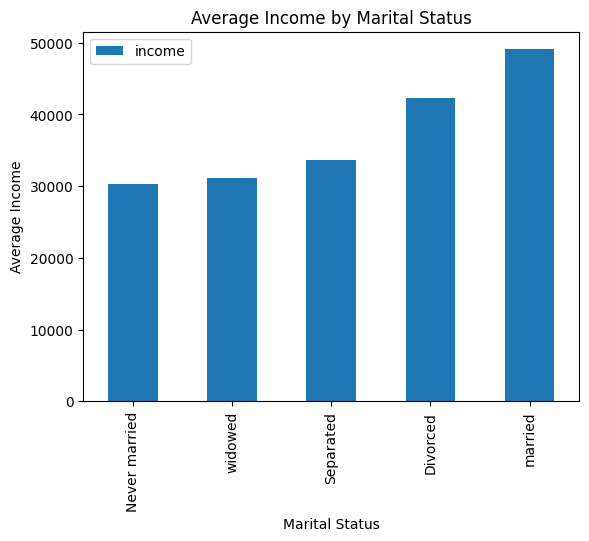

In [56]:
# your code here
MARITAL_STATUS_CODES = {'married':0,
                        'widowed':1,
                        'Divorced':2, 
                        'Separated':3,
                        'Never married':4}


MARITAL_STATUS_CODES = {v:k for k,v in MARITAL_STATUS_CODES.items()}
census["marital_status_label"] = census["marital_status"].apply(lambda code :MARITAL_STATUS_CODES[code])

plot = (census.groupby("marital_status_label")
 .agg({"income":"mean"})
 .sort_values("income")
 .plot.bar(title="Average Income by Marital Status", 
           xlabel="Marital Status",
           ylabel="Average Income")
)

plot;


In [57]:
# See if there is a relationship between marital status and income

one_hot_encode = pd.get_dummies(census["marital_status_label"])
one_hot_encode = one_hot_encode.join(census["income"])

X = one_hot_encode.drop("income", axis=1)
y = one_hot_encode["income"]

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80, random_state = 109, shuffle=True)

linreg = LinearRegression(fit_intercept=False)
linreg.fit(X_train, y_train)

print("---RESULTS---")
print(f"Train MSE: {mean_squared_error(y_train, linreg.predict(X_train))}")
print(f"Test MSE: {mean_squared_error(y_test, linreg.predict(X_test))}")
print(f"Train R^2: {linreg.score(X_train,y_train)}")
print(f"Test R^2: {linreg.score(X_test,y_test)}")
print("\n")
print("---Coefficents---")
print(f"intercept {linreg.intercept_}")
print(pd.DataFrame(zip(X.columns,linreg.coef_), columns=["degree","coefficent"]).set_index("degree").sort_values("coefficent", ascending=False))


---RESULTS---
Train MSE: 1210802448.1615536
Test MSE: 1218973843.7634113
Train R^2: 0.05666067594242363
Test R^2: 0.05941774159498703


---Coefficents---
intercept 0.0
               coefficent
degree                   
married         49010.261
Divorced        42365.966
Separated       33587.874
widowed         31417.469
Never married   30250.363


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q4.8</b></div>

What is the average effect of the `military_service` variable on income?

_Points:_ 3

Someone who has undergone miltary service can expect to earn roughly 10367.76 less on average than someone who hasn't (as per regression coefficient and graphs). 

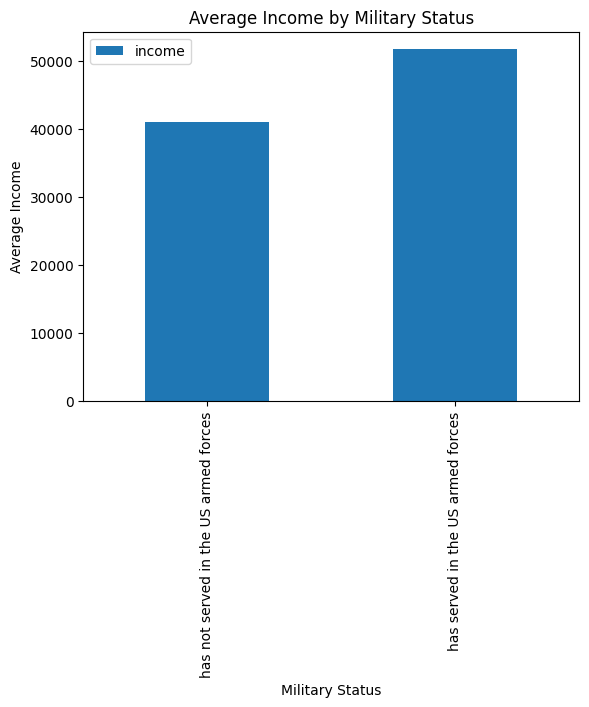

In [58]:
MILITARY_SERVICE_CODES = {'has not served in the US armed forces':0,'has served in the US armed forces':1}
MILITARY_SERVICE_CODES = {v:k for k,v in MILITARY_SERVICE_CODES.items()}
census["military_service_label"] = census["military_service"].apply(lambda code : MILITARY_SERVICE_CODES[code])

plot = (census.groupby("military_service_label")
 .agg({"income":"mean"})
 .sort_values("income")
 .plot.bar(title="Average Income by Military Status", 
           xlabel="Military Status",
           ylabel="Average Income")
)

plot;

In [59]:
# See if there is a relationship between education level and income
# one_hot_encode = pd.get_dummies(census["military_service_label"])
# one_hot_encode = one_hot_encode.join(census["income"])
# X = one_hot_encode.drop("income", axis=1)
# y = one_hot_encode["income"]

X = census[["military_service_label"]]
y = census["income"]

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80, random_state = 109, shuffle=True)

# one hot encoding
drop_strategy = 'first'
unknown_strategy = 'ignore'
ohe = OneHotEncoder(drop=drop_strategy, 
                    sparse=False, 
                    handle_unknown=unknown_strategy
                   ) 

# One Hot Encode Training Data
ohe_train = ohe.fit_transform(X_train)
ohe.get_feature_names_out()
ohe_train_df = pd.DataFrame(ohe_train, columns=ohe.get_feature_names_out())

# One Hot Encode Testing Data
ohe_test = ohe.transform(X_test)
ohe_test_df = pd.DataFrame(ohe_test, columns=ohe.get_feature_names_out())


linreg = LinearRegression(fit_intercept=True)
linreg.fit(ohe_train_df, y_train)

print("---RESULTS---")
print(f"Train MSE: {mean_squared_error(y_train, linreg.predict(ohe_train_df))}")
print(f"Test MSE: {mean_squared_error(y_test, linreg.predict(ohe_test_df))}")
print(f"Train R^2: {linreg.score(ohe_train_df,y_train)}")
print(f"Test R^2: {linreg.score(ohe_test_df,y_test)}")
print("\n")
print("---Coefficents---")
print(f"intercept {linreg.intercept_}")
print(pd.DataFrame(zip(ohe_train_df.columns,linreg.coef_), columns=["degree","coefficent"]).set_index("degree").sort_values("coefficent", ascending=False))


---RESULTS---
Train MSE: 1276714142.9580872
Test MSE: 1287099307.9090137
Train R^2: 0.005308703776147228
Test R^2: 0.00685090166745439


---Coefficents---
intercept 41126.268334660126
                                                          coefficent
degree                                                              
military_service_label_has served in the US armed forces    10367.76


<!-- END QUESTION -->

<a id="part5questions"></a>

## <div class='exercise'><b>Question 5:  Calculate the Gini coefficient [10 pts]</b></div>

[Return to contents](#contents)


**Gini coefficients are often used to quantify income inequality.** For an introductory overview of the Gini coefficient, its derivation, and its uses, you can [read more about it here](https://en.wikipedia.org/wiki/Gini_coefficient). That article also provides [a useful graphical representation](https://en.wikipedia.org/wiki/File:Economics_Gini_coefficient2.svg) of the Gini coefficient to better understand how it measures inequality. 

The Gini coefficient is defined by the formula:

$$G = \dfrac{ \sum_{i=1}^{n} (2i - n - 1) x_i}{n  \sum_{i=1}^{n} x_i}$$

where $x$ is an observed value, $n$ is the number of values observed and $i$ is the rank of values in **ascending** order.

A Gini coefficient of $G=0$ implies perfect income equality, whereas a Gini coefficient close to $G=1$ implies a concentration of wealth among the richest few.

<div class='exercise'><b>Q5.1</b></div>

Based on the above formula, calculate and report the Gini coefficient for the income of those people in the the provided ASEC dataset. Store the result in `gini_coef`.

- **NOTE:** For algorithmic simplicity and consistency, you can rank income values for all observations, keeping duplicate values in your sorted array. Therefore, you will likely have sorted income values $x_i$ similar to `[417, 417, 417, ..., 250000, 250000, 250000]` with corresponding rank indices $i$ similar to `[1, 2, 3, ..., 12353, 12354, 12355]`. Nothing more sophisticated than that is required for dealing with ties (i.e. duplicates) in your sorted income values for Question 5.1.

_Points:_ 7

In [60]:
# your code here
df = pd.read_csv("data/census_data.csv")
reported_incomes = sorted(df["income"])

def calculate_gini(observations):
    observations.sort() # make sure observations are sorted
    n = len(observations)
    numerator = sum([ (2*(i+1) - n -1) * x for i,x in enumerate(observations)])
    denominator = n * sum(observations)
    
    return numerator/denominator


gini_coef = calculate_gini(reported_incomes)

In [61]:
# Print resulting Gini coefficient
print(f"The Gini Index for this dataset is {gini_coef:.3f}")

The Gini Index for this dataset is 0.473


In [62]:
grader.check("q5.1")

q5.1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<div class='exercise'><b>Q5.2</b></div>

According to the [World Bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the country with the largest Gini coefficient is South Africa, ranked 1st at $0.63$, while the lowest is the Slovak Republic, ranked 162nd at $0.232$. The United States is ranked 46th on the list and has a Gini index of $0.415$.

- How well does your calculated Gini coefficient for this simulated dataset match the world bank estimate?

- Might the self-report nature of the data, preprocessing steps, or simulation (i.e., sampling) procedure have affected your results? If so, how?

**Note:** The World Bank estimate website uses a [0,100] range for the Gini Index. Above we have converted this to a [0,1] range.

_Points:_ 3

The world bank estimates US gini coefficient at 0.415, while our estimation currently lies at 0.473. This gives us a relative error of $\frac{|0.415 - 0.473|}{|0.415|} = 0.1397$. 

Our Gini coefficient is higher which means we are predicting a more unequal dispersion of income. This could be because of sampling methods. Lower income populations, and minorities are less likely to participate in a census. Our dataset could be biased and looking at only middle and upper class citizens. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<a id="part6questions"></a>

## <div class='exercise'><b>Question 6:  Critiquing the simulated data [5 pts]</b></div>

[Return to contents](#contents)

Take a look at both the [data dictionary for the original dataset](https://www2.census.gov/programs-surveys/cps/datasets/2021/march/asec2021_ddl_pub_full.pdf) and the notebook used to create the simplified simulation, `data/preprocessing.ipynb`. 

What might you have done differently were you to write your own preprocessing code?
A nonexhaustive list of a few things to consider would be:
- Are there important features you think should have been included that were not? 
- Do you agree with the methods used to reduce the number of unique categorical values?
- Might there be a better way to simulate a continuous response from the discrete income brackets in the original data?

**Note:** We used the record type 'person' data from the ASEC rather than 'household' or 'family.' All three record types are represented in the data dictionary.

_Points:_ 5

Some features that were left out, but could have been included:
- PRDISFLG: This indicates if someone has a disability or not. Some disabilities prevent people from working
- PRCITSHP: Undocumented people are less likely to be eligible for high paying jobs  
- GEDIV: Salaries are higher in New England, California, and Seattle than the Mid West for example

Concerning the number of unique categorical values:
- As a positive reducing the number of unique categorical values helps decrease the sparsity of the matrix when we encode our values.
    - I.e 26 values for race would result in an extra 26 columns getting created which is not ideal.
- On the negative side, we do lose some detail when we group values together. Sometimes we manually combine groups that should not have been combined.
- For the sake of this homework assignment, our actions were okay.  

The method use to simulate a continuous response is flawed.
- Using the 42 buckets from the census was a good idea
- Forcing an exponential distribution on the last bucket creates extreme maximum values which increases variance in our data set.
- We know that income is skewed in the country; however, assuming that the last bucket grows exponentially is a very large assumption 

<!-- END QUESTION -->

**This concludes HW2. Thank you!**

[Return to contents](#contents)